In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

In [5]:
plt.plot(xs, ys)

In [6]:
h = 0.0000001
x = 3
f(x+h)

20.00000140000003

In [7]:
h = 0.0000001  #small increment
#slope = (y(added increment) - y(initial))/ amt of increment in x
(f(x + h) - f(x))/h

14.000000305713911

In [8]:
h = 0.00000001
x = -3
(f(x+h) - f(x))/h

-22.00000039920269

In [9]:
h = 0.00000001
x = 2/3
(f(x+h) - f(x))/h

0.0

In [10]:
# lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [11]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
#a += h
#b+=h
c+=h
d2 = a*b +c
print("d1: ",d1)
print("d2: ",d2)
print('slope: ',( (d2) - (d1) )/h)

d1:  4.0
d2:  4.0001
slope:  0.9999999999976694


In [12]:
# value object
# takes a single scalar value that it wraps and keep tracks off
class Value:
    def __init__(self,data, _children=(),_op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label= label
        
    def __repr__(self):       # wrapper function
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self,other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other), '*')
        return out
a = Value(2.0, label = 'a')
b = Value(-3.0, label='b')
c = Value(10,label='c')
#a, b
#a + b #add two value objects #if we use this #python will internally call a.__add__(b)
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0,label='f')
L=d*f
L

Value(data=-8.0)

In [13]:
d._prev

{Value(data=-6.0), Value(data=10)}

In [14]:
!pip install graphviz

from graphviz import Digraph

def trace(root):
    #builds a set of all nodes and edeges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})  #LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        #for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ data %.4f }" % (n.data, ), shape = 'record')
        if n._op:
            # if thid value is a result of some operation , create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
        for n1,n2 in edges:
            # connect n1 to the op node of n2
            dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        return dot

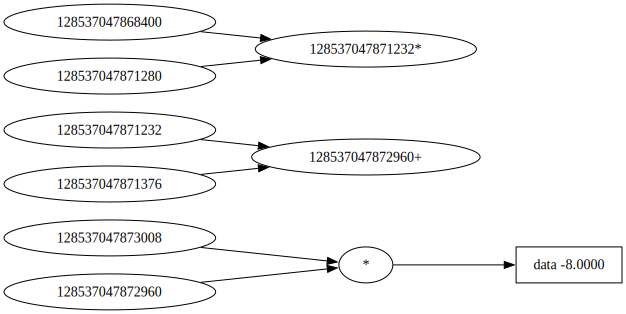

In [15]:
draw_dot(L)